In [ ]:
# # Scikit Learn # #
# Framework mais utilizado para aprendizado de maquina
# Problemas de classificação
# Problemas de Regressão
# Redução e dimensão
# Seleção de modelo
# Clustering
# Preprocessing
# Foi desenvido baseado no numpy, scipy e matplotlib


In [ ]:
!pip install scikit-learn
# from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression

In [ ]:
# Dataset Examples
The digit Dataset
The Iris Dataset
Plot ramdomly

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

In [ ]:
# dados EXCEl
arquivo_excel = pd.ExcelFile('https://pycourse.s3.amazonaws.com/temperature.xlsx')
display(arquivo_excel) # tipo Io do pandas, porque o excel possui duas plandas

df = pd.read_excel(arquivo_excel, sheet_name='Sheet1')
# vai salvar a primeira planilha
display(df)

In [ ]:
# extracao de x e y
x, y = df[['temperatura']].values, df[['classification']].values
print(x)
print(y)

In [ ]:
#pre-processamento
from sklearn.preprocessing import LabelEncoder


In [ ]:
# conversao de y para valores numericos
le = LabelEncoder()
y = le.fit_transform(y.ravel()) # transforma valores string em numerico
print(y)

[3 2 3 3 0 1]


In [ ]:
# funcao de descrimina as classes
from sklearn.linear_model import LogisticRegression


In [ ]:
# classificador
clf = LogisticRegression()
clf.fit(x, y) # treinando o modelo

LogisticRegression()

In [ ]:
#gera valores espacados entre 0 e 45
x_test = np.linspace(start=0, stop=45., num=100).reshape(-1, 1)

#predicao desses valores
y_pred = clf.predict(x_test)

In [ ]:
# resultado em valores numericos
print(y_pred)

['frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'confortavel' 'confortavel' 'confortavel' 'confortavel' 'confortavel'
 'confortavel' 'quente' 'quente' 'quente' 'quente' 'quente' 'quente'
 'quente' 'quente' 'quente' 'quente' 'quente' 'quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito 

In [ ]:
# conversao em valores originais
y_pred = le.inverse_transform(y_pred)
print(y_pred)

In [ ]:
# output
output = {'new_temp': x_test.ravel(),
          'new_class': y_pred.ravel()}
output = pd.DataFrame(output) #cria um DF do dicionario
output.head() # 5 primeiros dados do DF

,new_temp,new_class
0,0.000000,frio
1,0.454545,frio
2,0.909091,frio
3,1.363636,frio
4,1.818182,frio


In [ ]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


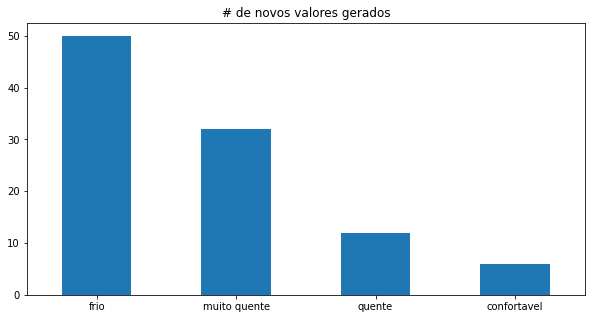

In [ ]:
# contagem de valores gerados
output['new_class'].value_counts().plot.bar(figsize=(10,  5),
                                            rot=0,
                                            title='# de novos valores gerados');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


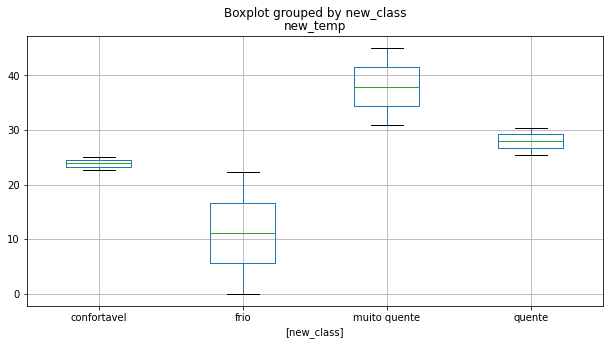

In [ ]:
output.boxplot(by='new_class', figsize=(10, 5));

In [ ]:
# sistema automatico
def classify_temp():
  ask = True
  while ask:
    temp = input('Insira a temperatura(graus Celsius): ')
    temp = np.array(float(temp)).reshape(-1, 1)
    class_temp = clf.predict(temp)
    class_temp = le.inverse_transform(class_temp)
    print(f'A classificação da temperatura {temp.ravel()[0]} é: ', class_temp[0])
    ask = input('Nova classificação (y/n') == 'y'
    

In [ ]:
# rodando o programa
classify_temp()